# Задачи курса
1. Считать аудио файл (можно использовать библиотечные функции)
2. Научится добавлять писк (правильно подобранная синусойда) к аудио данным и записывать файл обратно.
3. Посчитать спектрограмму (нужно реализовать самостоятельно)
4. Показать влияние синосойды
5. Реализовать фильтр Чебышёва (во временной шкале) для того чтобы убрать писк
6. Показать какое влияние оказывает на спектрограмму.
7. Выделить гармоники, хотя бы главную.
8. Построить её график.
9. Реализовать корректное ускорение/замедление проигрывания не искажающее частоту.

Фактически все нужно реализовать вручную. Пункты можно объединять если это удобно в одну программу.
Язык любой. Файл лучше поищите сами. Формат наверное wav.
Ограничения. Время работы должно быть не больше десятка секунд на каждый из рассматриваемых пунктов при показе. т.е. эффективность с точки зрения теории алгоритмов не учитывается

### Источники информации
https://medium.com/nuances-of-programming/

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wavName = 'audio_2.wav'

# Считывание файла

In [3]:
import librosa

# для воспроизведения аудио-файла 
import IPython.display as ipd 

# для визуализации
import librosa.display

In [4]:
# Этот фрагмент возвращает звуковой временной ряд в качестве массива numpy
# с частотой дискретизации по умолчанию 22 кГц моно. 
audioFile = wavName
x , sr = librosa.load(audioFile)
print(type(x), type(sr))
print(x.shape, sr)

# Это поведение можно изменить с помощью повторного семплинга на частоте 44,1 кГц.
#librosa.load(audioFile, sr=44100)

# Повторный семплинг также можно отключить:
#librosa.load(audioFile, sr=None)

<class 'numpy.ndarray'> <class 'int'>
(340703,) 22050


In [5]:
ipd.Audio(audioFile)

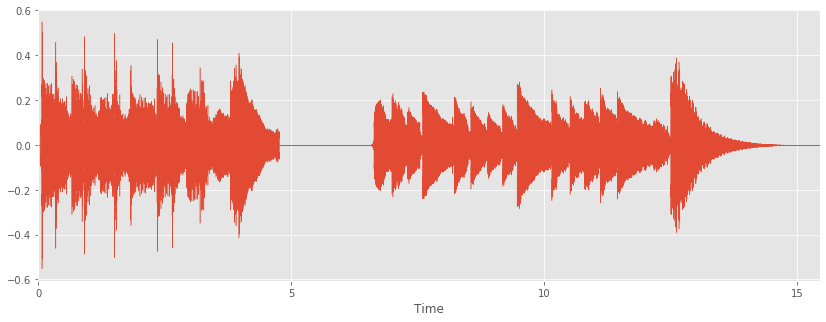

In [6]:
plt.style.use('ggplot')
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

# Добавление писка

In [7]:
import numpy as np

# для записи файла
import soundfile as sf 

In [8]:
#sr = 22050                                        # частота дискретизации
T = librosa.get_duration(filename = wavName)       # секунды
t = np.linspace(0, T, x.shape[0], endpoint=False)  # переменная времени
pisk = 0.25*np.sin(2*np.pi*220*t)                  # чистая синусоидная волна при 220 Гц

# сохранение аудио
sf.write('audio_2_pisk.wav', pisk + x, sr)

ipd.Audio(pisk + x, rate=sr)

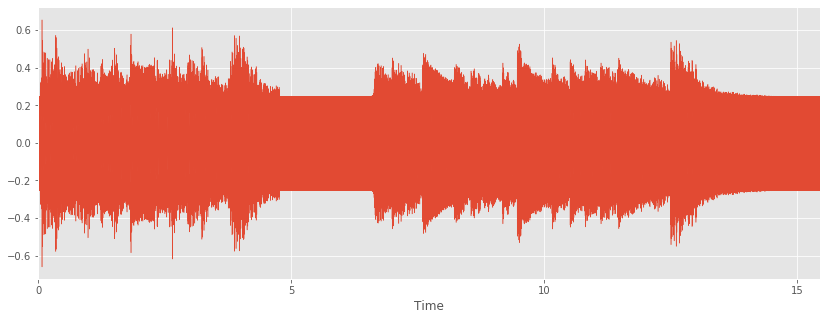

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x+pisk, sr=sr)

# Спектрограмма

Спектрограмма — это визуальный способ представления уровня или “громкости” сигнала во времени на различных частотах, присутствующих в форме волны.

На вертикальной оси показаны частоты (от 0 до 10 кГц), а на горизонтальной — время. Третье измерение с указанием амплитуды на определенной частоте в конкретный момент времени представлено интенсивностью или цветом каждой точки изображения.

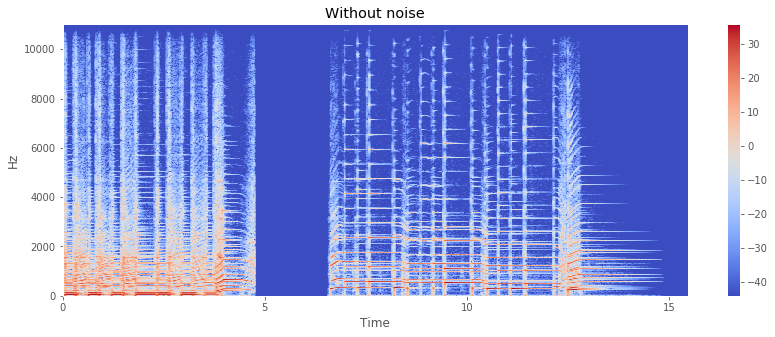

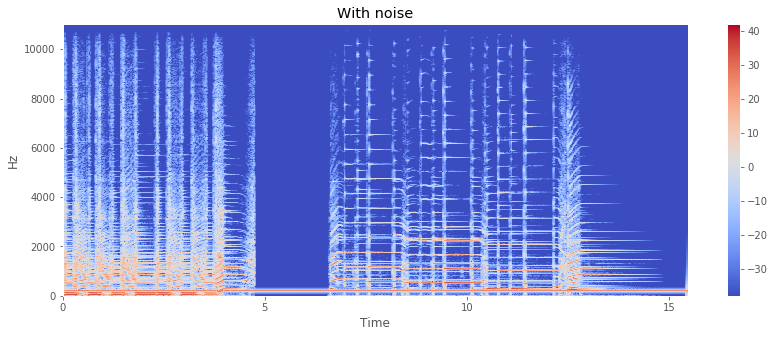

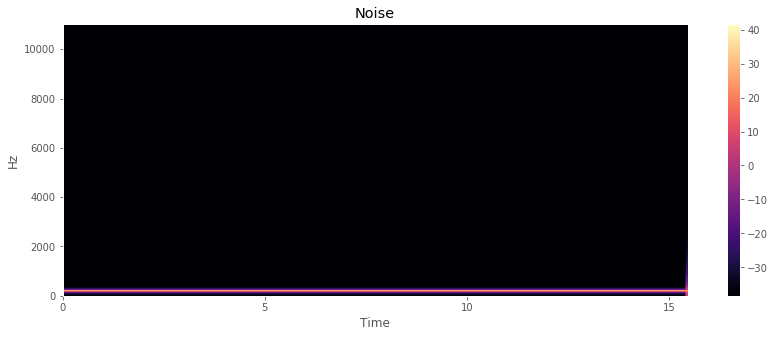

In [10]:
# библиотечная функция

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
plt.title("Without noise")
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

X = librosa.stft(x+pisk)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
plt.title("With noise")
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

X = librosa.stft(pisk)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
plt.title("Noise")
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

# Фильтр Чебышева